In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("MNRAS")

import pyvista as pv

In [3]:
import ellipsoid3d

In [4]:
from ellipsoid3d.features import ellipsoid_estimation

In [5]:
from ellipsoid3d.models import model_ellipsoid

In [6]:
# uniform_ellipsoid_shell = model_ellipsoid.uniform_ellipsoid_shell(1,1,1, n_points=100000)
uniform_ellipsoid = model_ellipsoid.uniform_ellipsoid(3,2,1, n_points=10000000)

In [26]:
axes, vec, mask = ellipsoid_estimation.reduced_iterative_tensor_shell(uniform_ellipsoid, [0,0,0], 0,100)

projection matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
deteminant of projection matrix 1.0
q,s 1.0 1.0
print mean rp is 1.576014585289484
print max rp is 2.999408484748253
Number of particles in shell:  5236325
mean r reduced -0.00026670918928606676
projection matrix
[[-9.99999683e-01  7.87627007e-04  1.13478899e-04]
 [ 7.87515107e-04  9.99999207e-01 -9.82779656e-04]
 [ 1.14252873e-04  9.82689978e-04  9.99999511e-01]]
deteminant of projection matrix -1.0
q,s 0.8011108433804109 0.5093258810025956
print mean rp is 1.8813061883309368
print max rp is 2.99944590186315
Number of particles in shell:  5236325
mean r reduced 0.00029145378108154125
projection matrix
[[-9.99999999e-01  1.73918923e-05  3.93693295e-05]
 [-1.73972565e-05 -9.99999991e-01 -1.36256443e-04]
 [ 3.93669594e-05 -1.36257127e-04  9.99999990e-01]]
deteminant of projection matrix 0.9999999999999998
q,s 0.7203425651477948 0.39443766303986155
print mean rp is 2.0808966093390415
print max rp is 2.999672365881544
Number of particl

In [29]:
a,b,c = axes
q, s = b/a, c/a
rot_matrix = np.array([vec[0], vec[1], vec[2]])
points = np.matmul(rot_matrix, uniform_ellipsoid.T)
radius_min, radius_max = 1,2
rp_squared = (points[0]**2 + (points[1]/q)**2 + (points[2]/s)**2)
mask = (rp_squared >= radius_min**2) & (rp_squared <= radius_max**2)
np.sum(mask)

1356927

In [30]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.ERROR)

In [31]:
quad_mask = lambda points: points[(points[:,0] > 0.0) & (points[:,1] > 0.0) & (points[:,2] > 0.0)]
raw_points_to_plot = quad_mask(uniform_ellipsoid)
points_to_plot = quad_mask(uniform_ellipsoid[mask])

In [32]:
points_to_plot

array([[0.77662076, 0.22971267, 0.23589747],
       [0.55965133, 0.80912625, 0.48421764],
       [0.8984937 , 0.35753163, 0.26457336],
       ...,
       [1.70324005, 0.10276995, 0.09611735],
       [0.6735443 , 0.29413807, 0.36071659],
       [1.48494498, 0.88251918, 0.04881025]])

(array([ 6410., 14268., 21547., 27905., 35171., 25935., 17281., 11757.,
         6984.,  2380.]),
 array([0.66711389, 0.80015022, 0.93318654, 1.06622286, 1.19925919,
        1.33229551, 1.46533183, 1.59836816, 1.73140448, 1.8644408 ,
        1.99747713]),
 <BarContainer object of 10 artists>)

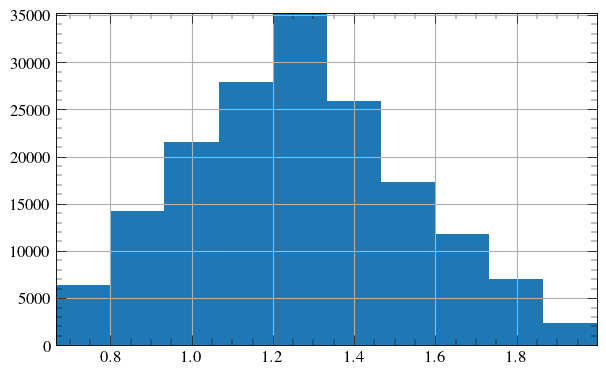

In [33]:
x,y,z = points_to_plot[:,0], points_to_plot[:,1], points_to_plot[:,2]
plt.hist(np.sqrt(x**2 + y**2 + z**2*4))

/var/folders/j7/r3wnq6gn16q2hngrn4zt4_q80000gn/T/ipykernel_28721/3529776408.py:8: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


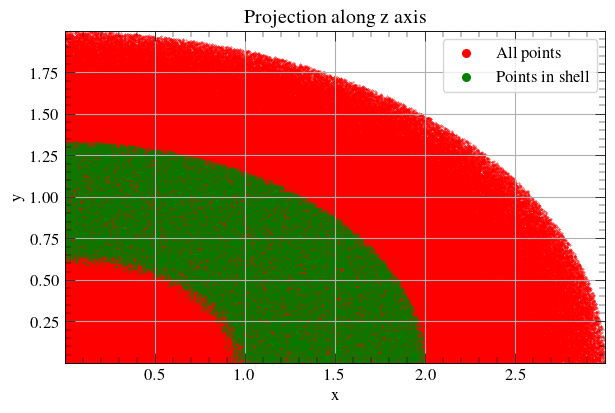

In [54]:
layer_mask = points_to_plot[:,2] < 0.15
plt.scatter(raw_points_to_plot[:,0], raw_points_to_plot[:,1], s=0.1, color="red",label="All points")
plt.scatter(points_to_plot[:,0][layer_mask], points_to_plot[:,1][layer_mask], s=0.1, color = "green", label="Points in shell")
plt.title("Projection along z axis")
plt.xlabel("x")
plt.ylabel("y")
legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_sizes([30.0])

In [34]:

pl = pv.Plotter()
SCLAE = 1
actor_1 = pl.add_points(raw_points_to_plot, color="red", point_size=0.01)
actor_2 = pl.add_points(points_to_plot, color="green", point_size=0.01)
pl.camera.zoom(1.5)
pl.camera.view_angle = 30
viewup = [0.5, 0.5, 1]
pl.show(auto_close=False)
path = pl.generate_orbital_path(factor=2.0, n_points=100, viewup=viewup)
pl.open_gif("ellipsoid_fitting_methods.gif")
pl.orbit_on_path(path, write_frames=True)
pl.close()

Widget(value="<iframe src='http://localhost:61236/index.html?ui=P_0x1b1d63ed0_3&reconnect=auto' style='width: …

In [13]:
2/3, 1/3

(0.6666666666666666, 0.3333333333333333)